In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
plt.rcParams.update({"text.usetex": True,
                     "axes.spines.right" : False,
                     "axes.spines.top" : False,
                     "font.size": 20,
                     "savefig.dpi": 500,
                     "savefig.bbox": 'tight',
                     'text.latex.preamble': r'\usepackage{amsfonts}\usepackage[version=4]{mhchem}'
                    }
                   )

from geomstats.geometry.euclidean import Euclidean
from geomstats.geometry.functions import SRVF, ProbabilityDistributions, L2Space
from geomstats.information_geometry.normal import NormalDistributions
from geomstats.geometry.discrete_curves import DiscreteCurves
import geomstats.backend as gs

from head.distances import AmplitudePhaseDistance

INFO: Using numpy backend


In [2]:
N_SAMPLES = 100
lambda_ = np.linspace(-5,5,num=N_SAMPLES)

Rn = Euclidean(N_SAMPLES)
srvf = SRVF(lambda_)
L2 = L2Space(lambda_)
normal = NormalDistributions()
pdist = ProbabilityDistributions(lambda_)

def gaussian(mu,sig):
    scale = 1/(np.sqrt(2*np.pi)*sig)
    return scale*np.exp(-np.power(lambda_ - mu, 2.) / (2 * np.power(sig, 2.)))

Euclidean/MSE distance : [3.34, 3.34, 3.01]
SRSF distance : [1.78, 1.78, 1.61]
Amplitude-Phase distance : [0.55, 0.62, 0.57]
L2 distance : [0.34, 0.34, 0.30]


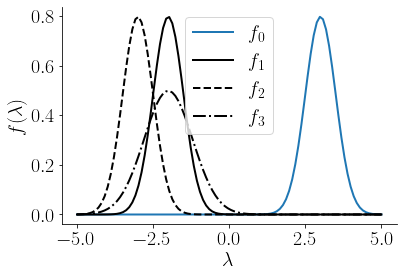

In [3]:
fig, ax = plt.subplots()
y0 = gaussian(3,0.5)
y1 = gaussian(-2,0.5)
y2 = gaussian(-3,0.5)
y3 = gaussian(-2,0.8)
ax.plot(lambda_, y0, lw=2.0, label=r'$f_{0}$')
ax.plot(lambda_, y1, color='k', lw=2.0, label=r'$f_{1}$')
ax.plot(lambda_, y2, ls='--', color='k', lw=2.0, label=r'$f_{2}$')
ax.plot(lambda_, y3, ls='dashdot', color='k', lw=2.0, label=r'$f_{3}$')
print('Euclidean/MSE distance : [%.2f, %.2f, %.2f]'%(
    Rn.metric.dist(y0, y1), 
    Rn.metric.dist(y0, y2),
    Rn.metric.dist(y0, y3)
))
print('SRSF distance : [%.2f, %.2f, %.2f]'%(
    srvf.metric.dist(y0, y1), 
    srvf.metric.dist(y0, y2),
    srvf.metric.dist(y0, y3)
))
print('Amplitude-Phase distance : [%.2f, %.2f, %.2f]'%(
    sum(AmplitudePhaseDistance(y0, y1, lambda_)), 
    sum(AmplitudePhaseDistance(y0, y2, lambda_)),
    sum(AmplitudePhaseDistance(y0, y3, lambda_)),
))
print('L2 distance : [%.2f, %.2f, %.2f]'%(
    L2.metric.dist(y0, y1), 
    L2.metric.dist(y0, y2),
    L2.metric.dist(y0, y3)
))
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$f(\lambda)$')
ax.legend()
plt.savefig('../figures/flat_metrics.pdf')
plt.show()

In [4]:
100*((3.34-3.01)/(3.34))

9.880239520958087

In [5]:
100*((1.78-1.61)/(1.78))

9.550561797752804

In [6]:
100*((0.57-0.55)/(0.57))

3.508771929824545

In [7]:
100*((0.34-0.30)/(0.34))

11.764705882352951